# Evaluation Plots of systemds permutation explainer and python permutation explainer

Test env:
DISTRIB_ID=Ubuntu
DISTRIB_RELEASE=20.04
DISTRIB_CODENAME=focal
DISTRIB_DESCRIPTION="Ubuntu 20.04.6 LTS"

vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel Xeon Processor (Cascadelake)
stepping	: 6
microcode	: 0x1
cpu MHz		: 2593.904
cache size	: 16384 KB
cores       : 8 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
data_10p = pd.read_csv("../data/runtimes/runtimes_permutation_all_algos_10perm.csv")
data_10p = data_10p.groupby('instances').mean()
#data_10p_10000 = pd.read_csv("../data/runtimes_permutation_10perm_10000.csv")
data_3p = pd.read_csv("../data/runtimes/runtimes_permutation_all_algos.csv")


#data_3p_20000_prior = pd.read_csv("../data/runtimes/runtimes_permutation_3perm_with_rm_nonvars.csv")

In [12]:

#data_10p_10000 = data_10p_10000.groupby('instances').mean()
data_3p = data_3p.groupby('instances').mean()



In [4]:
data_3p_20000

,runtime_python,runtime_row,runtime_row_non_var,runtime_row_partitioned,runtime_permutation,runtime_legacy,runtime_legacy_iterative
instances,,,,,,,
1,2.796392,3.768333,3.505667,2.991667,3.224000,3.412667,3.293333
500,17.705557,13.627000,13.971667,5.404333,19.821333,35.394000,40.275000
1000,30.768404,22.016333,21.532667,6.468333,34.138000,65.232333,70.080333
1500,45.225574,30.221667,30.857667,8.353333,51.333333,93.258000,100.301333
2000,57.759551,37.431333,39.353333,9.265667,70.206333,114.919333,132.462333
2500,73.255939,46.554667,46.646667,10.364333,85.098333,141.776333,166.765667
3000,87.452083,54.482000,53.513667,11.953667,104.445333,NaN,NaN
3500,91.481623,60.323667,67.370333,12.510000,124.962333,NaN,NaN
4000,118.254094,73.828667,65.161000,13.971000,144.662000,NaN,NaN


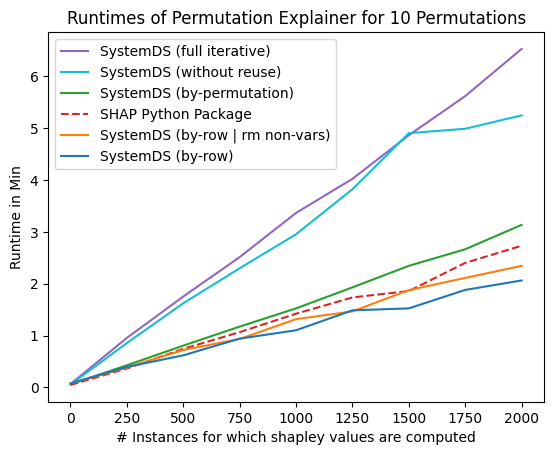

In [5]:
plt.plot(data_10p.runtime_legacy_iterative/60, label="SystemDS (full iterative)", color="tab:purple")
plt.plot(data_10p.runtime_legacy/60, label="SystemDS (without reuse)", color="tab:cyan")
plt.plot(data_10p.runtime_permutation/60, label="SystemDS (by-permutation)", color="tab:green")
plt.plot(data_10p.runtime_python/60, label="SHAP Python Package", linestyle="--", color="tab:red")
plt.plot(data_10p.runtime_row_non_var/60, label="SystemDS (by-row | rm non-vars)", color="tab:orange")
plt.plot(data_10p.runtime_row/60, label="SystemDS (by-row)", color="tab:blue")

plt.title("Runtimes of Permutation Explainer for 10 Permutations")
plt.xlabel("# Instances for which shapley values are computed")
plt.ylabel("Runtime in Min")
plt.legend()
#plt.savefig("../data/runtimes/10p_2000.png")

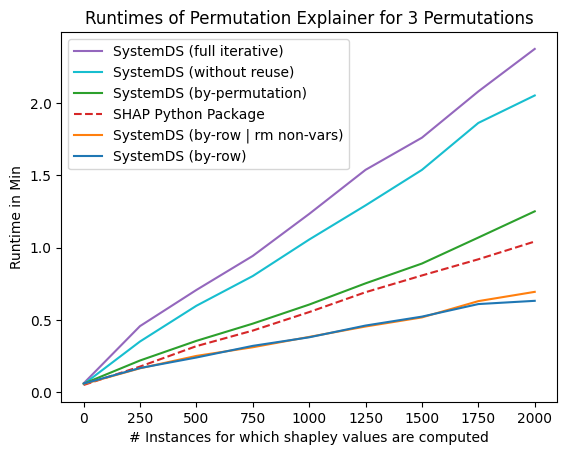

In [6]:
plt.plot(data_3p.runtime_legacy_iterative/60, label="SystemDS (full iterative)", color="tab:purple")
plt.plot(data_3p.runtime_legacy/60, label="SystemDS (without reuse)", color="tab:cyan")
plt.plot(data_3p.runtime_permutation/60, label="SystemDS (by-permutation)", color="tab:green")
plt.plot(data_3p.runtime_python/60, label="SHAP Python Package", linestyle="--", color="tab:red")
plt.plot(data_3p.runtime_row_non_var/60, label="SystemDS (by-row | rm non-vars)", color="tab:orange")
plt.plot(data_3p.runtime_row/60, label="SystemDS (by-row)", color="tab:blue")

plt.title("Runtimes of Permutation Explainer for 3 Permutations")
plt.xlabel("# Instances for which shapley values are computed")
plt.ylabel("Runtime in Min")
plt.legend()
#plt.savefig("../data/runtimes/3p_2000.png")

In [39]:
data_adult = pd.read_csv("../data/runtimes/100s_3p_partitions.csv")
data_adult = data_adult.groupby('instances').mean()

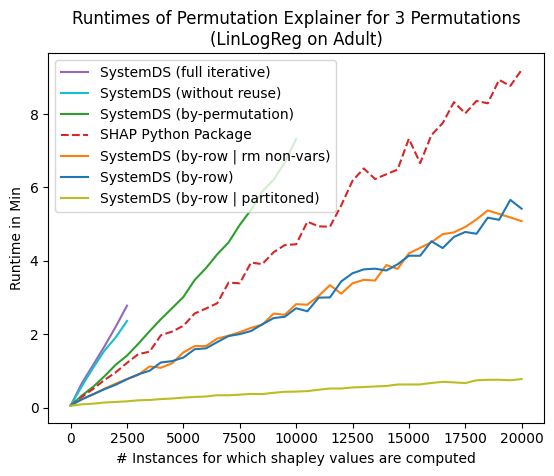

In [41]:
plt.plot(data_adult.runtime_legacy_iterative/60, label="SystemDS (full iterative)", color="tab:purple")
plt.plot(data_adult.runtime_legacy/60, label="SystemDS (without reuse)", color="tab:cyan")
plt.plot(data_adult.runtime_permutation/60, label="SystemDS (by-permutation)", color="tab:green")
plt.plot(data_adult.runtime_python/60, label="SHAP Python Package", linestyle="--", color="tab:red")
plt.plot(data_adult.runtime_row_non_var/60, label="SystemDS (by-row | rm non-vars)", color="tab:orange")
plt.plot(data_adult.runtime_row/60, label="SystemDS (by-row)", color="tab:blue")
plt.plot(data_adult.runtime_row_partitioned/60, label="SystemDS (by-row | partitoned)", color="tab:olive")

#plt.plot(data_3p_20000_prior.runtime_python/60, label="SHAP Python Package", linestyle="--", color="tab:red")
#plt.plot(data_3p_20000_prior.runtime_row_non_var/60, label="SystemDS (by-row | rm non-vars)", color="tab:orange")
#plt.plot(data_3p_20000_prior.runtime_row/60, label="SystemDS (by-row)", color="tab:blue")

plt.title("Runtimes of Permutation Explainer for 3 Permutations\n(LinLogReg on Adult)")
plt.xlabel("# Instances for which shapley values are computed")
plt.ylabel("Runtime in Min")
plt.legend()
plt.savefig("../data/runtimes/adult_linlogreg.pdf")

In [15]:
# runtimes of methods for linear svm on census dataset
data_census=pd.read_csv("../data/runtimes/runtimes_l2svm_linear.csv")
data_census = data_census[data_census.instances <= 9000]
data_census=data_census.drop(columns=['exp_type'])
data_census = data_census.groupby('instances').mean()

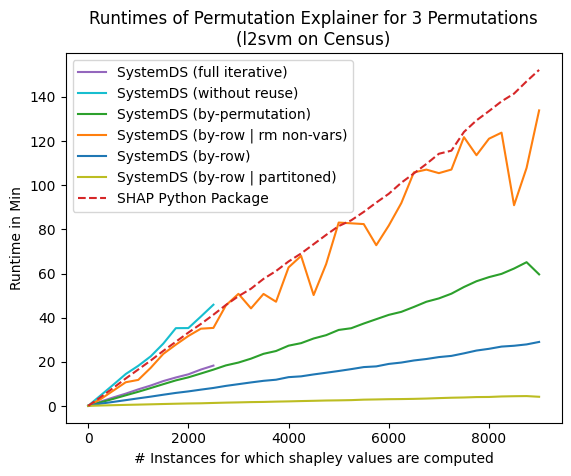

In [16]:
plt.plot(data_census.runtime_legacy_iterative/60, label="SystemDS (full iterative)", color="tab:purple")
plt.plot(data_census.runtime_legacy/60, label="SystemDS (without reuse)", color="tab:cyan")
plt.plot(data_census.runtime_permutation/60, label="SystemDS (by-permutation)", color="tab:green")
#plt.plot(data_census.runtime_python/60, label="SHAP Python Package", linestyle="--", color="tab:red")
plt.plot(data_census.runtime_row_non_var/60, label="SystemDS (by-row | rm non-vars)", color="tab:orange")
plt.plot(data_census.runtime_row/60, label="SystemDS (by-row)", color="tab:blue")
plt.plot(data_census.runtime_row_partitioned/60, label="SystemDS (by-row | partitoned)", color="tab:olive")

plt.plot(data_census.runtime_python/60, label="SHAP Python Package", linestyle="--", color="tab:red")
#plt.plot(data_3p_20000_prior.runtime_row_non_var/60, label="SystemDS (by-row | rm non-vars)", color="tab:orange")
#plt.plot(data_3p_20000_prior.runtime_row/60, label="SystemDS (by-row)", color="tab:blue")

plt.title("Runtimes of Permutation Explainer for 3 Permutations\n(l2svm on Census)")
plt.xlabel("# Instances for which shapley values are computed")
plt.ylabel("Runtime in Min")
plt.legend()
plt.savefig("../data/runtimes/census_l2svm_linear.pdf")

In [17]:
# runtimes of methods for linear svm on census dataset with cluster
data_cluster=pd.read_csv("../data/runtimes/runtimes_custer.csv")
#data_census = data_census[data_census.instances <= 9000]
data_cluster=data_cluster.drop(columns=['exp_type'])
data_cluster = data_cluster.groupby('instances').mean()

(-0.5, 8.0)

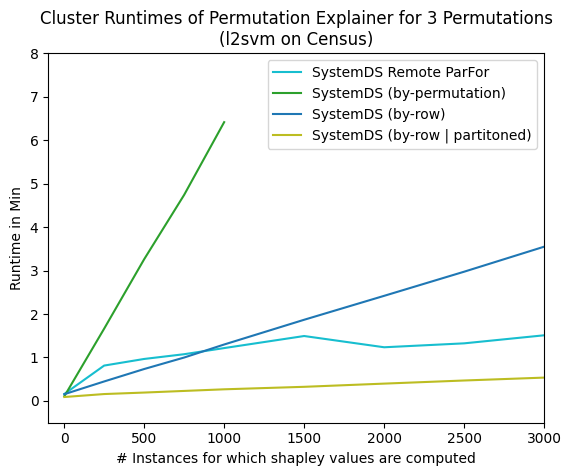

In [38]:
#plt.plot(data_cluster.runtime_legacy_iterative/60, label="SystemDS (full iterative)", color="tab:purple")
plt.plot(data_cluster.runtime_cluster/60, label="SystemDS Remote ParFor", color="tab:cyan")
plt.plot(data_cluster.runtime_permutation/60, label="SystemDS (by-permutation)", color="tab:green")
#plt.plot(data_cluster.runtime_python/60, label="SHAP Python Package", linestyle="--", color="tab:red")
#plt.plot(data_cluster.runtime_row_non_var/60, label="SystemDS (by-row | rm non-vars)", color="tab:orange")
plt.plot(data_cluster.runtime_row/60, label="SystemDS (by-row)", color="tab:blue")
plt.plot(data_cluster.runtime_row_partitioned/60, label="SystemDS (by-row | partitoned)", color="tab:olive")

plt.title("Cluster Runtimes of Permutation Explainer for 3 Permutations\n(l2svm on Census)")
plt.xlabel("# Instances for which shapley values are computed")
plt.ylabel("Runtime in Min")
plt.legend()
#plt.xlim(-100,3000)
#plt.ylim(-.5,8)
#plt.savefig("../data/runtimes/census_l2svm_linear_cluster_zoom.pdf")
plt.savefig("../data/runtimes/census_l2svm_linear_cluster.pdf")

In [18]:
data_cluster

,runtime_row,runtime_row_non_var,runtime_row_partitioned,runtime_permutation,runtime_cluster
instances,,,,,
1,9.343333,9.545000,5.474000,6.453000,9.663667
250,26.937000,328.673667,9.563667,99.798333,48.857667
500,44.092667,652.978333,11.621667,195.576000,57.986333
750,59.962333,1003.162000,13.874000,284.407667,64.539333
1000,77.933333,1316.245667,16.109500,384.732667,72.999500
1500,112.075333,NaN,19.549333,NaN,89.645000
2000,145.094000,NaN,23.963667,NaN,74.118000
2500,178.394333,NaN,28.261333,NaN,79.530667
3000,212.904667,NaN,32.259667,NaN,90.639667
